# Generating Observations

### Loading Python Modules:

In [1]:
import numpy as np
import random as rd
import pandas as pd
from class_state_vec import state_vector
from class_obs import obs_da

### Loading Lorenz63 run data from running "gen_nature_run.ipynb" and defining "x_nature" run:

In [2]:
#infile      = 'lorenz63_run.pkl'
infile      = 'lorenz63_run-001.pkl'    # Qiwen's run

sv          = state_vector()
sv          = sv.load(infile)
x_nature    = sv.getTrajectory()  # The trajectory obtained from "gen_nature_run.ipynb" is stored in x_nature
#x_nature    = x_nature.T
x_nature    = x_nature            # Qiwen's run
xdim, maxit = np.shape(x_nature)
std_nature  = np.zeros(xdim)
print('xdim =', xdim)    #row
print('maxit = ', maxit) #column


State_Vector Object Created!
State_Vector Object Name:  uninitialized
al:  [0]
t:  [0]
x0:  [0]
xdim = 3
maxit =  8000000


### Compute the standard deviation of each state:

In [3]:
for i in range(xdim):
    std_nature[i] = np.std(x_nature[i,:])

print('std_nature =', std_nature)

std_nature = [7.93480902 9.01853611 8.6225804 ]


### Generating Synthetic Observations:

In [4]:
outfile = 'y_obs.pkl'
obs     = obs_da(name = 'observe_full_state')
yo      = np.zeros_like(x_nature) # return the same shape as x_nature with zeros

np.random.seed(2) # set the seed for reproducibility

for i in range(xdim):
    yo[i,:] = x_nature[i,:] + np.random.normal(0, np.sqrt(2), maxit)  # add noise to the true state

obs.setVal(yo) # set the value of yo to obs class

#-----------------------------------------------------------------------
# Computing observation position:
#-----------------------------------------------------------------------

pos = np.zeros_like(yo)
for i in range(maxit):
    pos[:,i] = list(range(0,3))
    
obs.setPos(pos)

#print('pos: ', pos[:,1:10])
print('shape yo =', np.shape(yo), '\nyo =', yo)

#-----------------------------------------------------------------------
# Store the true and noisy observations:
#-----------------------------------------------------------------------

obs.save(outfile)

Obs_DA Object Created!
Obs_DA Object Name:  observe_full_state
t:  [0]
pos:  [0]
val:  [0]
err:  [0]
bias:  [0]
xt:  [0]


shape yo = (3, 8000000) 
yo = [[ 7.61809479  8.31852258  5.57078645 ... -7.5718385  -3.11120615
  -4.50616334]
 [ 9.24075185  8.88610517  9.5023434  ... -0.88219755 -0.5128387
  -1.37760787]
 [24.58586441 24.89554633 22.98834913 ... 26.27103631 27.59656942
  25.42050374]]


### Plotting PDF of the Synthetic Observations:

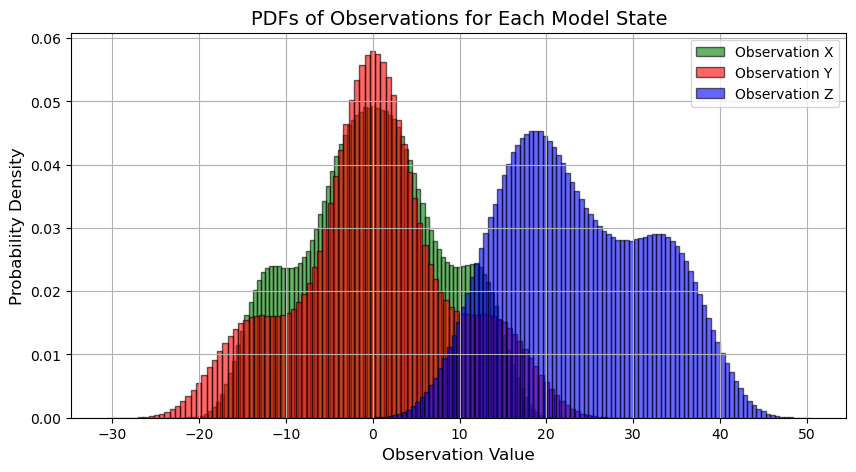

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Create figure and axis
fig, ax = plt.subplots(figsize=(10, 5))

# Define colors and labels for each observation channel
colors = ['green', 'red', 'blue']
labels = ['Observation X', 'Observation Y', 'Observation Z']

# Plot PDFs (histograms normalized to show probability density)
for i in range(3):
    ax.hist(yo[i, :], bins=100, density=True, alpha=0.6, 
            color=colors[i], label=labels[i], edgecolor='black')

# Add labels and title
ax.set_xlabel('Observation Value', fontsize=12)
ax.set_ylabel('Probability Density', fontsize=12)
ax.set_title('PDFs of Observations for Each Model State', fontsize=14)

# Add legend and grid for better readability
ax.legend()
ax.grid(True)

plt.show()


### Loading Observations:

In [6]:
#-----------------------------------------------------------------------
# Read the Lorenz-96 observations
#-----------------------------------------------------------------------
infile = 'y_obs.pkl'
obs = obs_da()
obs = obs.load(infile)

#-----------------------------------------------------------------------
# Get the Observed States
#-----------------------------------------------------------------------
y_obs = obs.getVal()
y_pos = obs.getPos()
y_err = obs.getErr()

print('y_obs =', y_obs)
print('y_err =', y_err)
print('y_pos =', y_pos)

Obs_DA Object Created!
Obs_DA Object Name:  uninitialized
t:  [0]
pos:  [0]
val:  [0]
err:  [0]
bias:  [0]
xt:  [0]
y_obs = [[ 7.61809479  8.31852258  5.57078645 ... -7.5718385  -3.11120615
  -4.50616334]
 [ 9.24075185  8.88610517  9.5023434  ... -0.88219755 -0.5128387
  -1.37760787]
 [24.58586441 24.89554633 22.98834913 ... 26.27103631 27.59656942
  25.42050374]]
y_err = [0]
y_pos = [[0 0 0 ... 0 0 0]
 [1 1 1 ... 1 1 1]
 [2 2 2 ... 2 2 2]]
